In [315]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [130]:
df = pd.read_csv('train.csv')

In [314]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [132]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [134]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Version-1: Only for non null rows

In [210]:
df1 = df.copy()

In [211]:
df1 = df1.dropna()

In [212]:
categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

### Label Fit

In [213]:
label_encoders = {}
for col in categorical_cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(df1[col])
    label_encoders[col] = label_encoder

### Label Transform

In [214]:
for col in categorical_cols:
    df1[col] = label_encoders[col].transform(df1[col])

### Correlation

In [309]:
matrix = df1.corr()

In [310]:
matrix

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.023210,0.005776,0.077974,0.028438,0.049772,0.038843,-0.011608,0.049712,-0.004265,-0.018872,-0.197603,0.040306
Gender,-0.023210,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.005776,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.077974,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.028438,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,0.049772,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.038843,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,-0.011608,0.156171,0.102950,-0.000318,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.049712,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.004265,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798


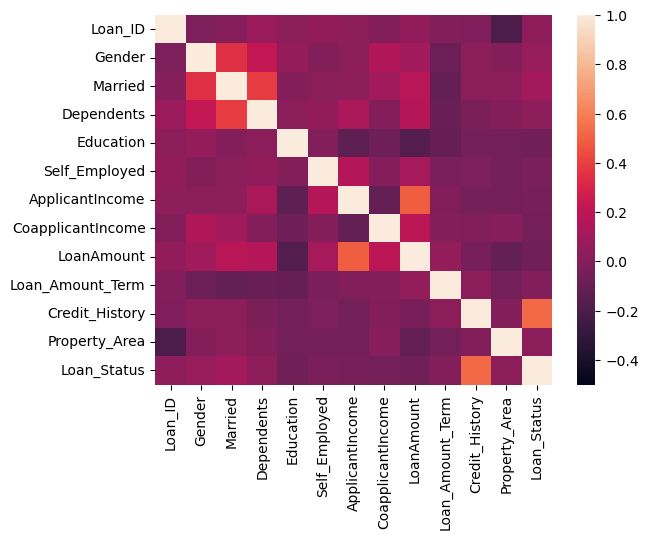

In [313]:
hm = sns.heatmap(data = matrix, vmin=-0.5, vmax=1)

In [229]:
X1=df1.drop(columns=['Loan_Status','Loan_ID'],axis=1)
y1=df1['Loan_Status']

### Scaling

In [227]:
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)

In [230]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)

### Logistic Regression

In [242]:
lr_model1 = LogisticRegression(max_iter=10000, random_state=42)

In [243]:
lr_model1.fit(X_train1, y_train1)
y_pred1 = lr_model1.predict(X_test1)

In [244]:
print(classification_report(y_pred1, y_test1))

              precision    recall  f1-score   support

           0       0.57      0.85      0.68        20
           1       0.95      0.83      0.89        76

    accuracy                           0.83        96
   macro avg       0.76      0.84      0.78        96
weighted avg       0.87      0.83      0.84        96



### SMOTE

In [236]:
sm = SMOTE(random_state = 42)
X_res1, y_res1 = sm.fit_resample(X_train1, y_train1)

In [245]:
lr_model1.fit(X_res1, y_res1)
y_pred1s = lr_model1.predict(X_test1)

In [246]:
print(classification_report(y_pred1s, y_test1))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        33
           1       0.82      0.86      0.84        63

    accuracy                           0.78        96
   macro avg       0.76      0.75      0.75        96
weighted avg       0.78      0.78      0.78        96



### Getting most imp features

In [263]:
coefficients = lr_model1.coef_[0]
coefficients

array([ 6.39822449e-01,  1.12370928e+00,  3.69890251e-02,  1.93243648e-01,
        3.24756429e-01, -5.67070417e-06, -5.13570890e-05, -2.55316730e-03,
        1.97743904e-03,  3.59114195e+00,  2.94047082e-01])

<Axes: ylabel='Feature'>

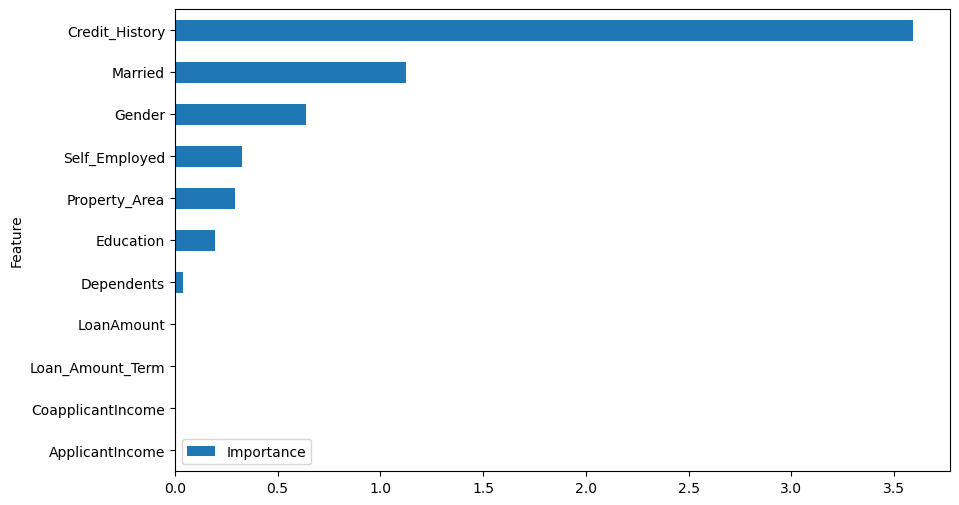

In [258]:
feature_importance = pd.DataFrame({'Feature': X1.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

### Decision Tree

In [251]:
dt_model1 = DecisionTreeClassifier(criterion='gini',random_state=42)

In [252]:
dt_model1.fit(X_train1, y_train1)
y_pred1 = dt_model1.predict(X_test1)

In [253]:
print(classification_report(y_pred1, y_test1))

              precision    recall  f1-score   support

           0       0.70      0.57      0.63        37
           1       0.76      0.85      0.80        59

    accuracy                           0.74        96
   macro avg       0.73      0.71      0.71        96
weighted avg       0.74      0.74      0.73        96



### SMOTE

In [254]:
dt_model1.fit(X_res1, y_res1)
y_pred1s = dt_model1.predict(X_test1)

In [255]:
print(classification_report(y_pred1s, y_test1))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62        38
           1       0.74      0.84      0.79        58

    accuracy                           0.73        96
   macro avg       0.72      0.70      0.70        96
weighted avg       0.73      0.73      0.72        96



## Version-2 Feature Importance

In [269]:
df2=df.copy()

### Taking Imp features only from the previous model

In [270]:
df2=df2[['Gender', 'Married', 'Self_Employed', 'Education', 'Property_Area', 'Credit_History', 'Loan_Status']]

In [271]:
df2=df2.dropna()

In [272]:
df2

,Gender,Married,Self_Employed,Education,Property_Area,Credit_History,Loan_Status
0,Male,No,No,Graduate,Urban,1.0,Y
1,Male,Yes,No,Graduate,Rural,1.0,N
2,Male,Yes,Yes,Graduate,Urban,1.0,Y
3,Male,Yes,No,Not Graduate,Urban,1.0,Y
4,Male,No,No,Graduate,Urban,1.0,Y
...,...,...,...,...,...,...,...
609,Female,No,No,Graduate,Rural,1.0,Y
610,Male,Yes,No,Graduate,Rural,1.0,Y
611,Male,Yes,No,Graduate,Urban,1.0,Y
612,Male,Yes,No,Graduate,Urban,1.0,Y


In [273]:
categorical_cols = df2.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Gender',
 'Married',
 'Self_Employed',
 'Education',
 'Property_Area',
 'Loan_Status']

### Label Fit

In [274]:
label_encoders = {}
for col in categorical_cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(df2[col])
    label_encoders[col] = label_encoder

### Label Transform

In [275]:
for col in categorical_cols:
    df2[col] = label_encoders[col].transform(df2[col])

In [295]:
df2['Loan_Status'].value_counts()

Loan_Status
1    353
0    170
Name: count, dtype: int64

In [276]:
X2=df2.drop(columns=['Loan_Status'],axis=1)
y2=df2['Loan_Status']

### Scaling

In [277]:
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X2)

In [278]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)

### Logistic Regression

In [285]:
lr_model2 = LogisticRegression(max_iter=10000, random_state=42)

In [289]:
lr_model2.fit(X_train2, y_train2)
y_pred2 = lr_model2.predict(X_test2)

In [290]:
print(classification_report(y_pred2, y_test2))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76        21
           1       1.00      0.85      0.92        84

    accuracy                           0.88       105
   macro avg       0.81      0.92      0.84       105
weighted avg       0.92      0.88      0.89       105



### SMOTE

In [286]:
sm = SMOTE(random_state = 42)
X_res2, y_res2 = sm.fit_resample(X_train2, y_train2)

In [294]:
lr_model2.fit(X_res2, y_res2)
y_pred2s = lr_model2.predict(X_test2)

Loan_Status
1    282
0    282
Name: count, dtype: int64

In [292]:
print(classification_report(y_pred2s, y_test2))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76        21
           1       1.00      0.85      0.92        84

    accuracy                           0.88       105
   macro avg       0.81      0.92      0.84       105
weighted avg       0.92      0.88      0.89       105



### Decision Tree

In [296]:
dt_model2 = DecisionTreeClassifier(criterion='gini',random_state=42)

In [297]:
dt_model2.fit(X_train2, y_train2)
y_pred2 = dt_model2.predict(X_test2)

In [298]:
print(classification_report(y_pred2, y_test2))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        25
           1       0.96      0.85      0.90        80

    accuracy                           0.86       105
   macro avg       0.80      0.86      0.82       105
weighted avg       0.88      0.86      0.86       105



### SMOTE

In [300]:
dt_model2.fit(X_res2, y_res2)
y_pred2s = dt_model2.predict(X_test2)

In [301]:
print(classification_report(y_pred2, y_test2))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        25
           1       0.96      0.85      0.90        80

    accuracy                           0.86       105
   macro avg       0.80      0.86      0.82       105
weighted avg       0.88      0.86      0.86       105

